In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
import os


# Figure options
fm = matplotlib.font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v310.json"))
fm.findfont("Arial", rebuild_if_missing=True)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 7
plt.rcParams['pdf.fonttype'] = 42
opt_subtitle = { 'fontname':"Arial", 'fontweight':"bold", 'fontsize':11 }

fig_size_double = 19/2.54
fig_size_half   = 14/2.54
fig_size_single =  9/2.54
fig_size_min    =  3/2.54
dpi = 300

plt.style.use('default')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
col_learners = colors[6]
col_nonlearners = colors[9]
col_player1 = colors[0]
col_player2 = colors[1]
col_gray = '#666666'




behavior_df = pd.read_csv('behavior.csv')
behavior_df.set_index('subject', inplace=True)

rating_df = pd.read_csv('ratings.csv')
rating_df.set_index('subject', inplace=True)

voi_csv = 'params_modpsc_VOI'
brain_df = pd.read_csv(f'{voi_csv}_betas.csv')
voi_df = brain_df[ (brain_df['voi']=='Amy-BLA') ]
voi_df.set_index('subject', inplace=True)

figure-1


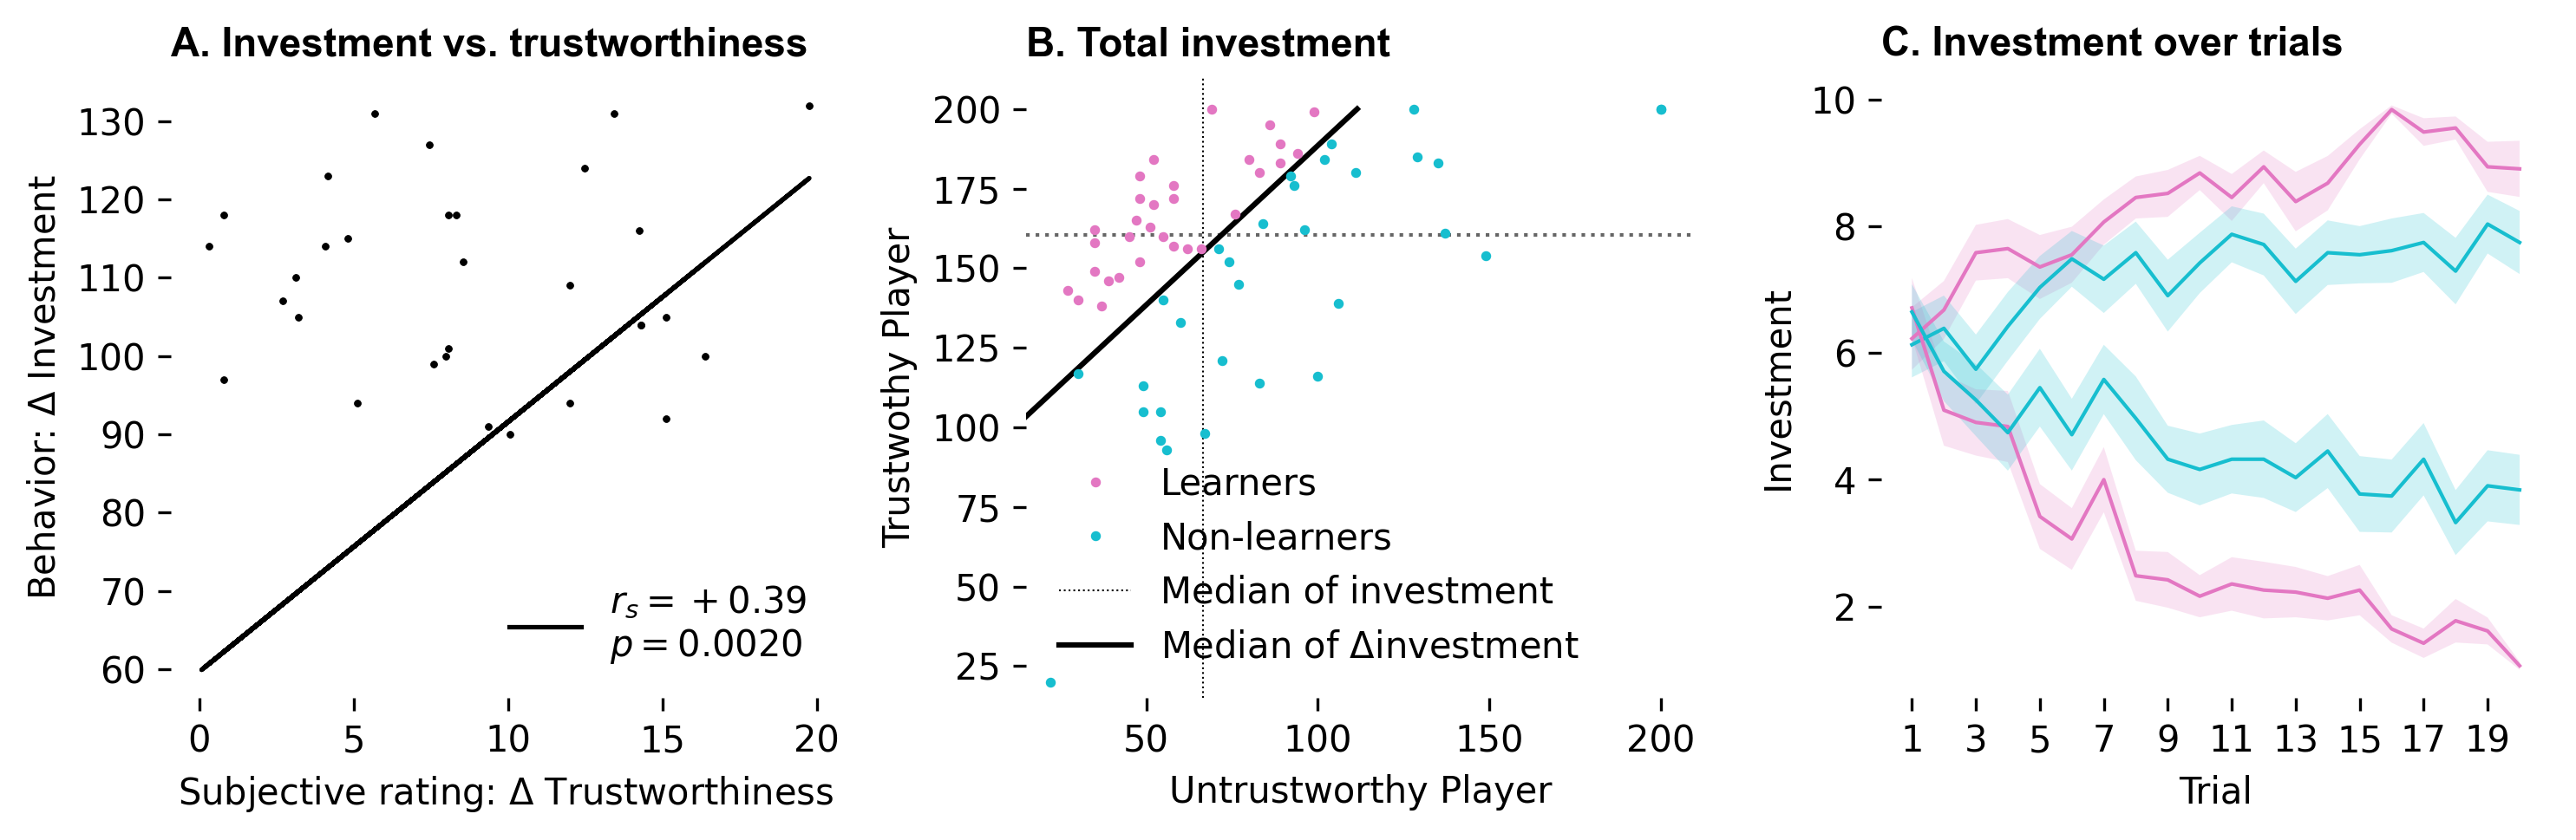

In [3]:
median_gain = np.median( behavior_df['gain'] )
median_diff_invest = np.median( behavior_df['diff_invest'] )
selector = behavior_df['diff_invest'] > median_diff_invest # good learners

sp_rows = 1
sp_cols = 3
a = 0
fig, axes = plt.subplots( sp_rows, sp_cols, figsize=[10, 3.33], dpi=dpi, sharey='none', squeeze=False)


# Panel A

x = rating_df[ behavior_df.index.isin( voi_df.index ) ]['rating4']

y_meas = 'diff_invest'
y = behavior_df[ behavior_df.index.isin( voi_df.index ) ][y_meas]

rho, pval = stats.spearmanr(x,y) 
corrtxt = f'$r_s={rho:+0.2f}$\n$p={pval:0.4f}$'

b, m = polyfit(x, y, 1)

ax = axes[0,a]
ax.set_title(f'A. Investment vs. trustworthiness', loc='left', fontdict=opt_subtitle)

ax.plot(x[selector], y[selector], '.', markersize=2, color = 'k' )
ax.plot(x[selector], y[selector], '.', markersize=2, color = 'k' )

ax.set_xlabel(f'Subjective rating: $\Delta$ Trustworthiness')
ax.set_ylabel(f'Behavior: $\Delta$ Investment')
ax.set(frame_on=False)


if pval < 0.05:
    g, = ax.plot(x, b + m * x, '-', color='k', linewidth=1.25, label=f'{corrtxt}')
    leg = ax.legend(handles=[g], frameon=False )
    leg.get_frame().set_edgecolor('#333333')
a += 1

x_meas = f'rating{1}'
x = rating_df[ behavior_df.index.isin( voi_df.index ) ][x_meas]

y_meas = 'diff_invest'
y = behavior_df[ behavior_df.index.isin( voi_df.index ) ][y_meas]






# Panel B

ax = axes[0,1]
ax.set(frame_on=False)
ax.set_title('B. Total investment', loc='left', fontdict=opt_subtitle )

ax.axhline(y=np.median(behavior_df['player1_invest']), linestyle=':', linewidth=1, color=col_gray, label='')
plt_median = ax.axvline(x=np.median(behavior_df['player2_invest']), linestyle=':', linewidth=0.5, color='k', label='Median of investment') 

plt_median_diff, = ax.plot( [ 0, 200-median_diff_invest ], [ median_diff_invest, 200 ], color='k', label='Median of $\Delta$investment' )


for index, row in behavior_df[selector].iterrows():
    plt_learners, = ax.plot( row.loc['player2_invest'], row.loc['player1_invest'], '.', fillstyle='full', markersize=3.5, color=col_learners, label='Learners' )

for index, row in behavior_df[~selector].iterrows():
    plt_nonlearners, = ax.plot( row.loc['player2_invest'], row.loc['player1_invest'], '.', fillstyle='full', markersize=3.5, color=col_nonlearners, label='Non-learners' )
     
ax.set(ylabel='Trustwothy Player', xlabel='Untrustworthy Player')
ax.legend( handles=[plt_learners, plt_nonlearners, plt_median, plt_median_diff], frameon=False )

ax.set_xlim([15,210])
ax.set_ylim([15,210])




# Panel C

ax = axes[0,2]
ax.set(frame_on=False)
ax.set_title('C. Investment over trials', loc='left', fontdict=opt_subtitle )


for p in [1,2]:
    y = behavior_df.loc[ selector, f'player{p}_invest_1':f'player{p}_invest_20']
    y_mean = np.mean( y, axis=0 )
    y_error = np.std( y, axis=0 )/np.sqrt(len(y))

    style_grp = {'marker':'', 'markersize':4, 'fillstyle':'full', 'markeredgewidth':0.0, 'linewidth':1.0}
    if p == 1:
        style_model = {'linestyle':'-', 'color': col_learners, 'markerfacecolor':col_player1}
    else:
        style_model = {'linestyle':'-', 'color': col_learners, 'markerfacecolor':col_player2}
    
    ax.plot( range(1,21), y_mean, **style_model, **style_grp )
    ax.fill_between(range(1,21), y_mean-y_error, y_mean+y_error, alpha=0.2, facecolor=col_learners, antialiased=True)  
    
    y = behavior_df.loc[ ~selector, f'player{p}_invest_1':f'player{p}_invest_20']
    y_mean = np.mean( y, axis=0 )
    y_error = np.std( y, axis=0 )/np.sqrt(len(y))

    style_grp = {'marker':'', 'markersize':4, 'fillstyle':'full', 'markeredgewidth':0.0, 'linewidth':1.0}
    if p == 1:
        style_model = {'linestyle':'-', 'color': col_nonlearners, 'markerfacecolor':col_player1}
    else:
        style_model = {'linestyle':'-', 'color': col_nonlearners, 'markerfacecolor':col_player2}
        
    ax.fill_between(range(1,21), y_mean-y_error, y_mean+y_error, alpha=0.2, facecolor=col_nonlearners, antialiased=True)
    ax.plot( range(1,21), y_mean, **style_model, **style_grp )
    

ax.set(xlabel='Trial', ylabel='Investment')
ax.set_xticks(range(1,21,2))


           

    
plt.tight_layout()
    
fig_output_file = 'figure-1'
print(fig_output_file)
fig.savefig(f'{fig_output_file}.png', bbox_inches='tight', pad_inches=0.25, facecolor='w', edgecolor='w') 
fig.savefig(f'{fig_output_file}.pdf', bbox_inches='tight', pad_inches=0.25, facecolor='w', edgecolor='w')
fig.show()